In [11]:
import pandas as pd
from omegaconf import OmegaConf
import os
import matplotlib.pyplot as plt


In [12]:
config = OmegaConf.load("./../../configs/template_generation.yaml")

In [13]:
category = 'java'

In [14]:
df = pd.read_csv(os.path.join(config.data_path, f'{category}_template_repos.csv'))

In [15]:
df

,id,full_name,owner,name,html_url,is_template,description,template_keywords,topics,license,size,metrics,languages,language,created_at,updated_at,code_lines
0,0,activeviam/pivot-spring-boot,activeviam,pivot-spring-boot,https://github.com/activeviam/pivot-spring-boot,True,Template for running ActivePivot as a Spring B...,['template'],[],Apache License 2.0,1316,"[{'language': 'Text', 'blankLines': 3, 'codeLi...","{'Java': 82914, 'JavaScript': 935}",Java,2019-02-17T11:57:42,2023-09-19T08:44:43,1885
1,1,AdamBien/aws-lambda-cdk-plain,AdamBien,aws-lambda-cdk-plain,https://github.com/AdamBien/aws-lambda-cdk-plain,True,Simplest Possible AWS Lambda Function with Clo...,['boilerplate'],"['aws', 'aws-lambda', 'corretto', 'devops', 'i...",MIT License,43,"[{'language': 'Java', 'blankLines': 47, 'codeL...","{'Java': 6974, 'Shell': 340}",Java,2021-09-30T07:28:13,2023-10-24T08:59:52,408
2,2,AdamBien/aws-quarkus-lambda-cdk-plain,AdamBien,aws-quarkus-lambda-cdk-plain,https://github.com/AdamBien/aws-quarkus-lambda...,True,Quarkus JAX-RS App Deployed with AWS CDK as AW...,[],"['alb', 'api-gateway', 'aws', 'aws-lambda', 'c...",MIT License,140,"[{'language': 'Properties', 'blankLines': 0, '...","{'Java': 31083, 'HTML': 5172, 'Shell': 495}",Java,2021-11-18T09:08:36,2024-01-25T01:48:59,1432
3,3,akshayp7/playwright-java-cucumber,akshayp7,playwright-java-cucumber,https://github.com/akshayp7/playwright-java-cu...,False,This is Boilerplate/Template for Playwright wi...,"['template', 'boilerplate']","['cucumber', 'extentreports', 'java', 'junit',...",MIT License,394,"[{'language': 'Java', 'blankLines': 141, 'code...","{'Java': 30249, 'Gherkin': 5231}",Java,2023-03-24T04:05:07,2023-05-02T05:56:09,1072
4,4,AlmasB/FXGL-FastRender,AlmasB,FXGL-FastRender,https://github.com/AlmasB/FXGL-FastRender,False,A quick demo of JavaFX PixelBuffer inside an F...,['demo'],[],MIT License,29,"[{'language': 'Markdown', 'blankLines': 25, 'c...",{'Java': 47999},Java,2021-01-06T11:27:22,2023-03-09T07:49:42,1111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,296,yidongnan/spring-boot-grpc-example,yidongnan,spring-boot-grpc-example,https://github.com/yidongnan/spring-boot-grpc-...,False,spring-boot-grpc-example,['example'],"['grpc', 'spring-boot', 'spring-boot-grpc']",MIT License,152,"[{'language': 'Bourne Shell', 'blankLines': 27...",{'Java': 14592},Java,2017-02-08T07:17:12,2023-10-17T06:19:46,757
297,297,yydzxz/ByteDance-Open-Demo,yydzxz,ByteDance-Open-Demo,https://github.com/yydzxz/ByteDance-Open-Demo,False,字节跳动小程序SDK的使用demo,['demo'],"['bytadance-sdk', 'bytedance', 'docker', 'dock...",MIT License,1447,"[{'language': 'Java', 'blankLines': 274, 'code...","{'Java': 79130, 'Dockerfile': 337}",Java,2020-07-12T08:07:11,2023-02-14T06:53:58,2165
298,298,zak905/keycloak-api-key-demo,zak905,keycloak-api-key-demo,https://github.com/zak905/keycloak-api-key-demo,False,Demonstration on how to add an API key authent...,['demo'],[],MIT License,41,"[{'language': 'Dockerfile', 'blankLines': 12, ...","{'Java': 13758, 'FreeMarker': 4479, 'JavaScrip...",Java,2019-06-17T10:27:25,2024-01-02T01:43:34,2652
299,299,ZaTribune/springboot-ddd-example,ZaTribune,springboot-ddd-example,https://github.com/ZaTribune/springboot-ddd-ex...,False,A demo project to demonstrate the concept of D...,['demo'],"['ddd-architecture', 'domain-driven-design', '...",MIT License,106,"[{'language': 'Markdown', 'blankLines': 25, 'c...",{'Java': 51305},Java,2022-07-13T03:53:01,2023-12-27T07:31:08,2024


There is 225/301 small repos less the 622.0 is size


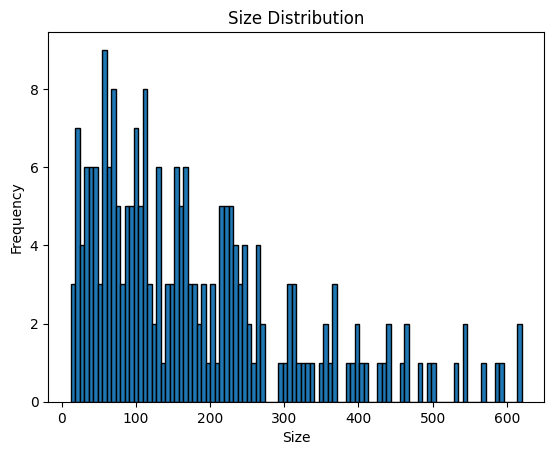

In [16]:
q = df['size'].quantile(0.75)
small_df = df[df['size'] < q]['size']
print(f"There is {len(small_df)}/{len(df)} small repos less the {q} is size")
plt.hist(small_df, bins=100, edgecolor='black')

plt.title('Size Distribution')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

There is 265/301 small repos less the 2017.0 is size


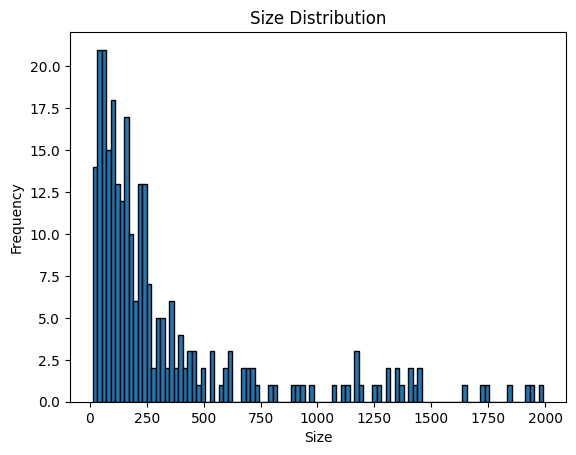

In [17]:
q = df['code_lines'].quantile(0.75)
small_df = df[df['size'] < q]['size']
print(f"There is {len(small_df)}/{len(df)} small repos less the {q} is size")
plt.hist(small_df, bins=100, edgecolor='black')

plt.title('Size Distribution')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

In [18]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/Maria.Tigina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Maria.Tigina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

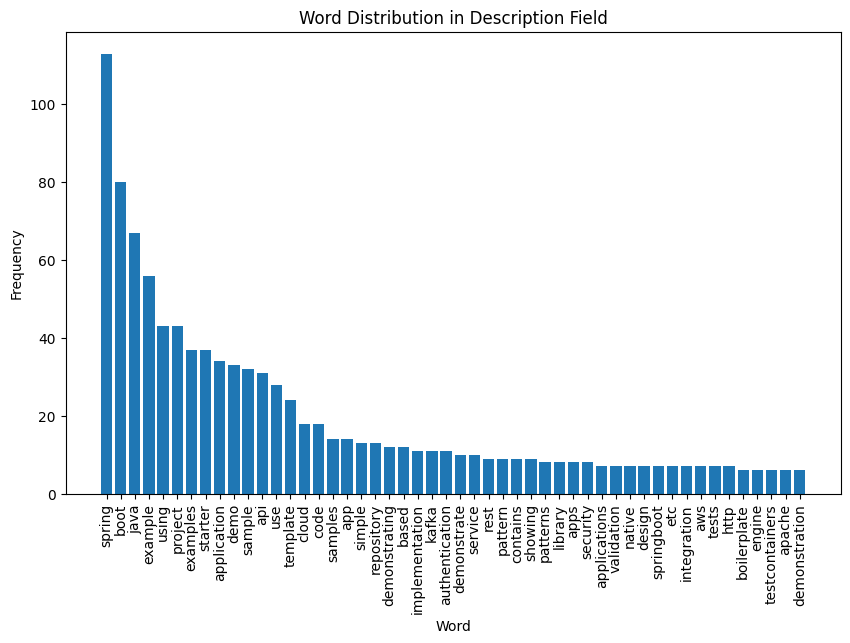

In [19]:
translator = str.maketrans('', '', string.punctuation)
descriptions = " ".join(map(lambda d: str(d), df['description']))
descriptions = descriptions.translate(translator)

tokens = word_tokenize(descriptions)
tokens = [word.lower() for word in tokens]
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if not word in stop_words]
# stemmer = PorterStemmer()
# tokens = [stemmer.stem(word) for word in tokens]

word_counts = Counter(tokens)

word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index').sort_values(by=0, ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(word_counts_df.index[:50], word_counts_df[0][:50])
plt.title('Word Distribution in Description Field')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')

plt.show()

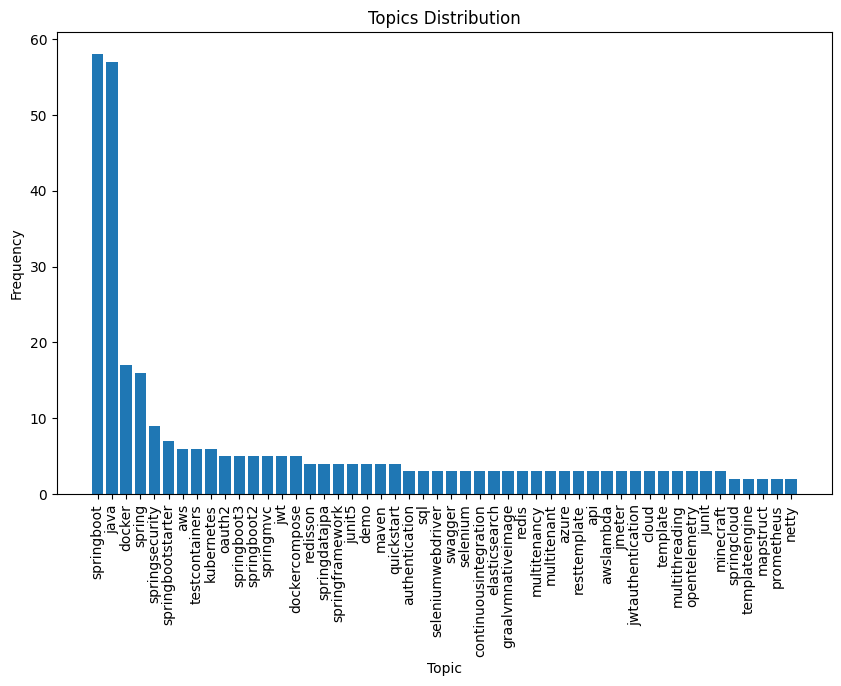

In [20]:
word_counts = Counter(tokens)

topics = " ".join(map(lambda d: str(d), df['topics']))
topics = topics.translate(translator)

tokens = word_tokenize(topics)
tokens = [word.lower() for word in tokens]
topics_counts = Counter(tokens)
topics_counts_df = pd.DataFrame.from_dict(topics_counts, orient='index').sort_values(by=0, ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(topics_counts_df.index[:50], topics_counts_df[0][:50])
plt.title('Topics Distribution')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')

plt.show()